In [261]:
import math
import numpy as np
import matplotlib.pyplot as plt
from gradient_engine.core import Value
from gradient_engine.nn import Neuron, MLP, Layer
%matplotlib inline

ModuleNotFoundError: No module named 'core'

In [253]:
!pip install -e .

Obtaining file:///media/cv/Extreme%20Pro1/code/eliird/gradient_engine
  Preparing metadata (setup.py) ... done
  Attempting uninstall: gradient-engine
    Found existing installation: gradient-engine 0.1.0
    Uninstalling gradient-engine-0.1.0:
      Successfully uninstalled gradient-engine-0.1.0
  Running setup.py develop for gradient-engine


In [213]:
# a simple neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
z = x1w1x2w2 + b; z.label="z"

out = z.tanh(); out.label="out"
out.backward()

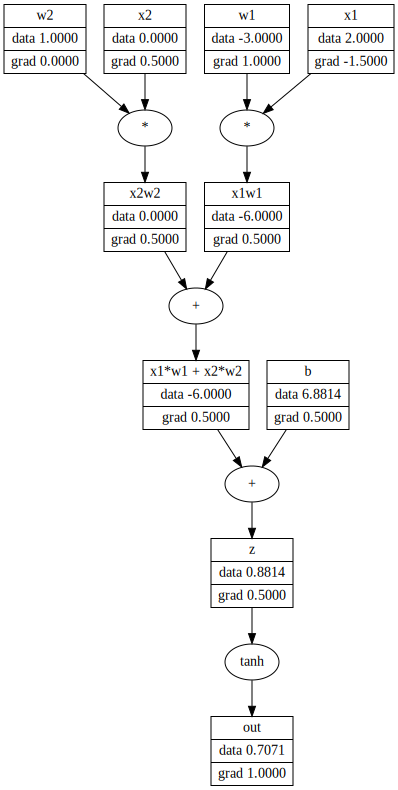

In [214]:
draw_dot(out)

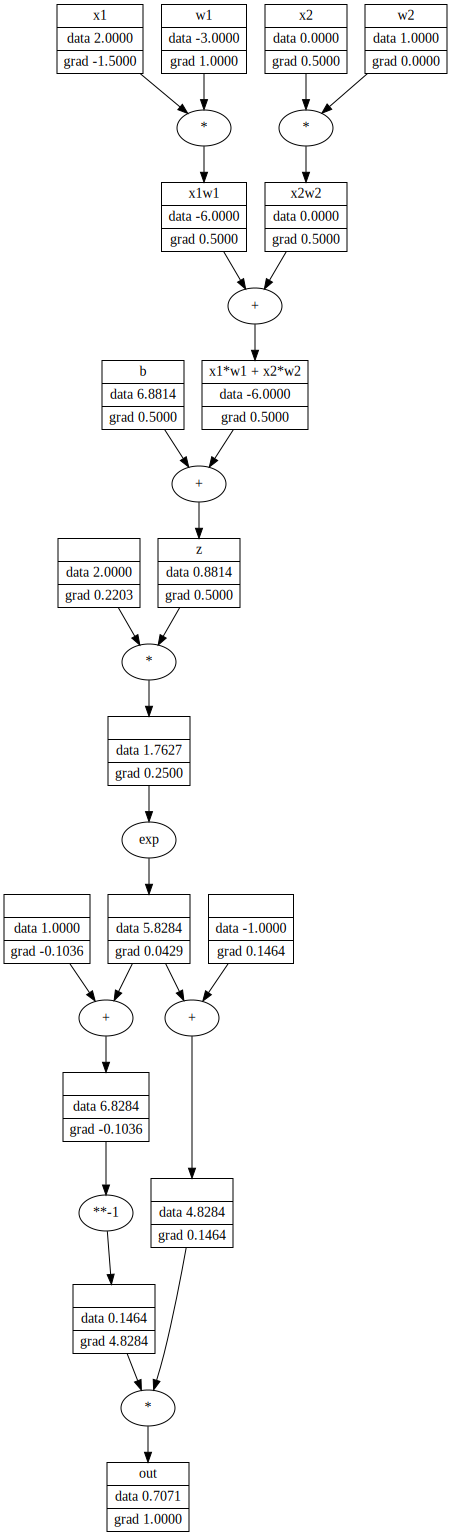

In [220]:
# a simple neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
z = x1w1x2w2 + b; z.label="z"

# -------------

e = (2 * z).exp()
out  = (e - 1)/(e + 1); out.label= "out"

# -------------
out.backward()
draw_dot(out)

In [228]:
import torch

x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True

w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True

b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1 * w1 + x2 * w2 + b

o = torch.tanh(n)

o.backward()
print('--------------')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

--------------
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [244]:
import random

class Neuron:
    def __init__(self, n_in) -> None:
        self.w = [Value(random.uniform(-1, 1)) for _ in range(n_in)]
        self.b = Value(random.uniform(-1, 1))
        
    def __call__(self, x):
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        return act.tanh()


class Layer:
    
    def __init__(self, n_in, n_out) -> None:
        self.neurons = [Neuron(n_in) for _ in range(n_out)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    

class MLP:
    def __init__(self, layers) -> None:
        self.layers = [Layer(layers[i-1], layers[i]) for i in range(1, len(layers))]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

x = [2.0, 3.0, -1.0]
n = MLP([3, 4, 2, 1])
out = n(x)
out.backward()

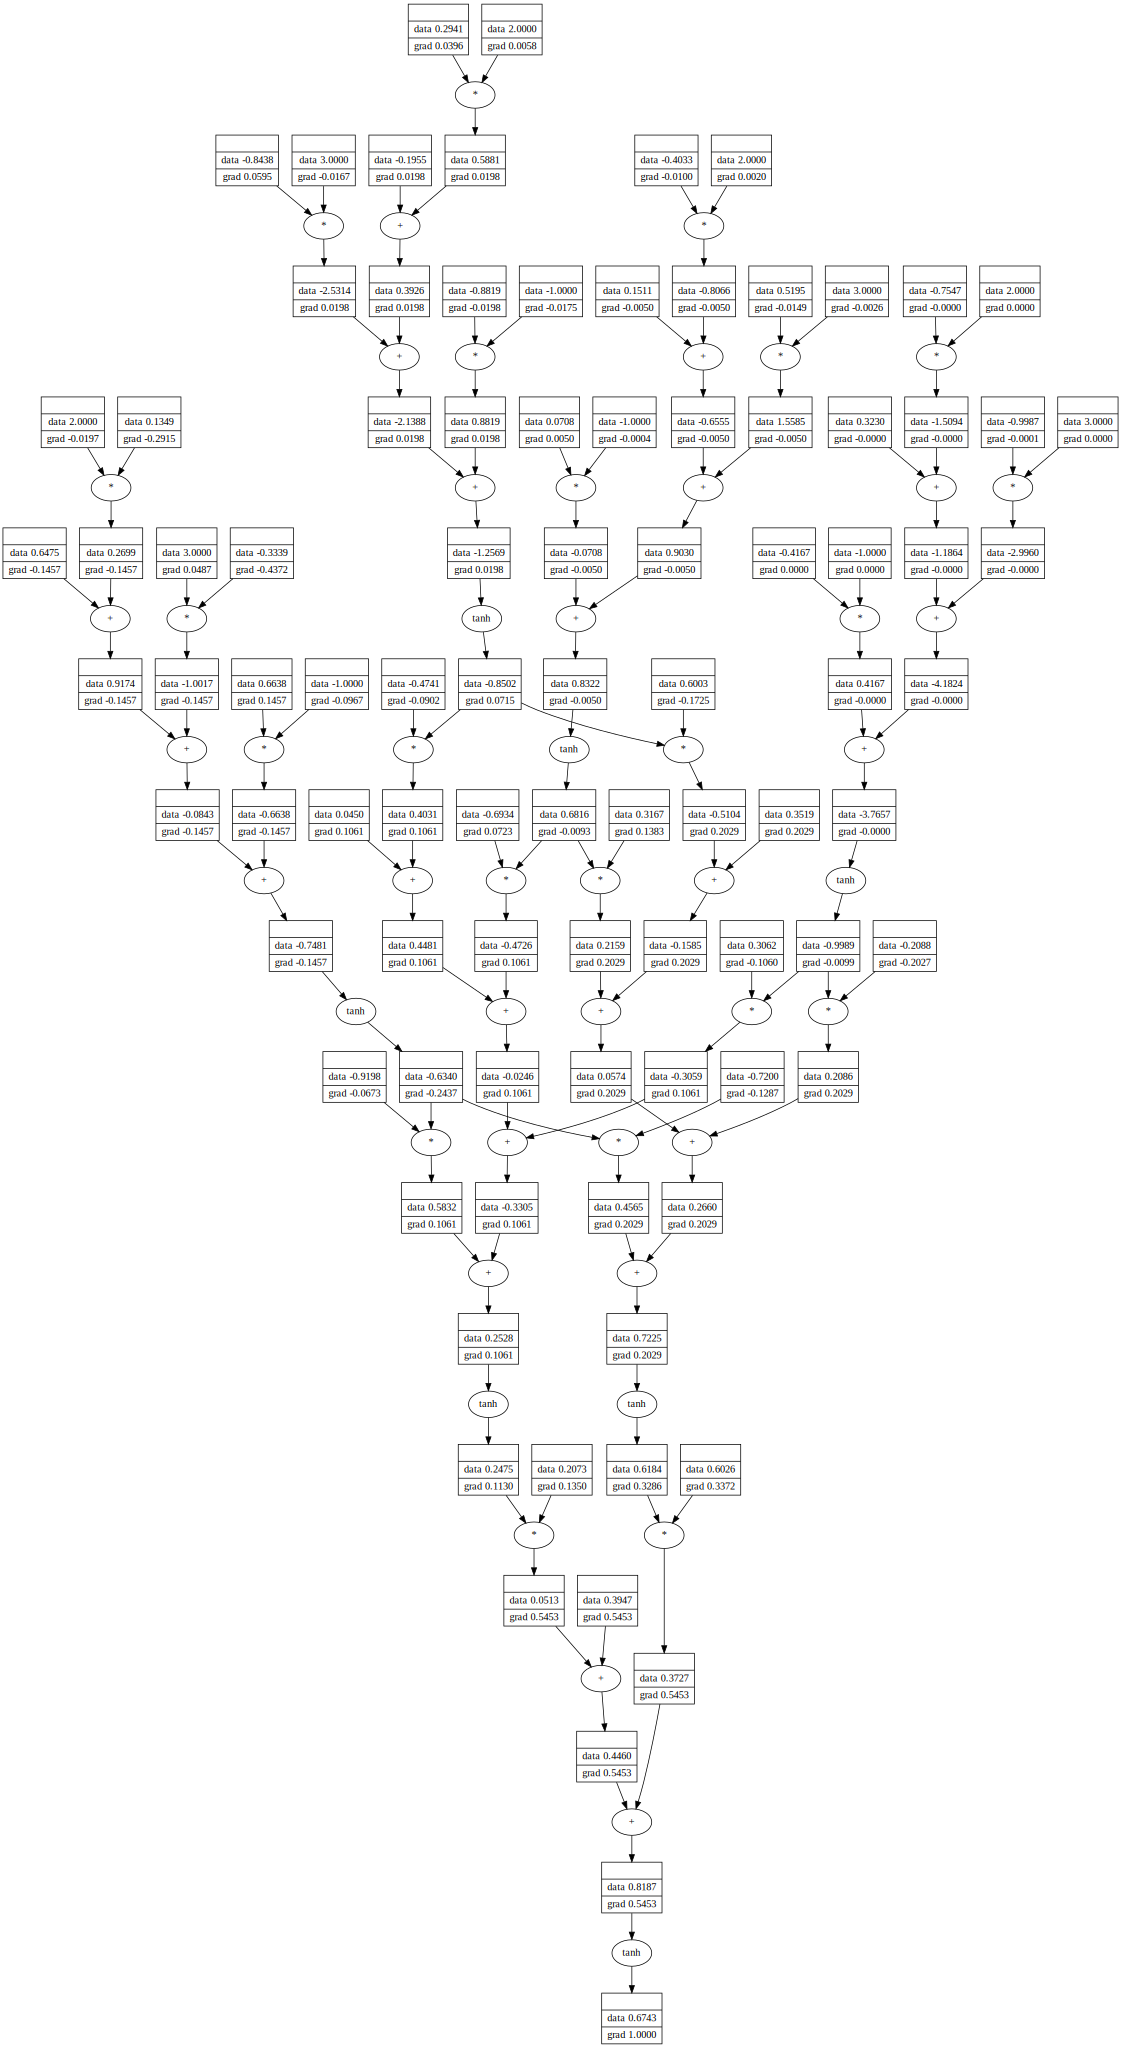

In [245]:
draw_dot(out)

In [247]:
# Example Usage

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

y_pred = [n(x) for x in xs]
y_pred

[Value(data=0.6743490355282897),
 Value(data=0.27081366574682175),
 Value(data=0.006855264121468117),
 Value(data=0.6397535603493218)]

In [ ]:
loss = 